# Metadata

## Import packages

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
# For data extraction from sharepoint
from io import BytesIO
from office365.runtime.auth.authentication_context import AuthenticationContext
from office365.sharepoint.client_context import ClientContext
# For data extraction from InfluxDB
from influxdb import InfluxDBClient
from functools import reduce

pd.set_option('display.max_columns', 200)

## Specify location of metadata

In [39]:
site_name = 'RD'  # Replace with your actual site name
folder_path = "Projects/Yara-N2, Effect of pressure on PNG"  # Replace with your actual folder path
file_name = "2024-1076-Testplan_and_log_NEW_OES.xlsx"  # Replace with your actual file name
sheet_name = '2024-1076-Testlog'  # Replace with the sheet name you want

## Functions for extracting metadata from sharepoint

In [ ]:
# # Constants for the SharePoint connection
# TENANT_ID = "c9dc265f-a55d-466a-920c-9eb2e81f750f"
# N2_URL = "https://n2applied.sharepoint.com/sites/"
# APPLICATION_ID = "f83dae31-1ffa-4457-8e00-bc48c0f02a29"

# def authenticate_sharepoint(site_name: str):
#     """Authenticate and return a client context for a SharePoint site."""
#     site_url = f'{N2_URL}{site_name}'
#     ctx_auth = AuthenticationContext(url=site_url)
#     ctx_auth.with_interactive(TENANT_ID, APPLICATION_ID)
#     ctx = ClientContext(site_url, ctx_auth)
#     return ctx

# def download_file(ctx: ClientContext, folder_path: str, file_name: str):
#     """Download a file from SharePoint."""
#     file_path = f'{folder_path}/{file_name}'
#     with open(file_name, "wb") as file:
#         ctx.web.get_file_by_server_relative_url(file_path).download(file).execute_query()

# def load_excelsheet(ctx: ClientContext, folder_path: str, file_name: str, sheet_name: str) -> pd.DataFrame:
#     """Load an Excel sheet from SharePoint into a pandas DataFrame."""
#     file_path = f'{folder_path}/{file_name}'
#     excel_file = ctx.web.get_file_by_server_relative_url(file_path)
#     file_content = excel_file.get_content().execute_query()
#     excel_sheet = pd.read_excel(io=BytesIO(file_content.value), sheet_name=sheet_name, skiprows=8)
#     return excel_sheet

# if __name__ == "__main__":
#     # Fill in these variables with your specific values
#     # site_name = 'RD'  # Replace with your actual site name
#     # folder_path = "Projects/Yara-N2, Effect of pressure on PNG"  # Replace with your actual folder path
#     # file_name = "2024-1076-Testplan_and_log_NEW_OES.xlsx"  # Replace with your actual file name
#     # sheet_name = '2024-1076-Testlog'  # Replace with the sheet name you want
#     # Authenticate and obtain client context
#     ctx = authenticate_sharepoint(site_name)
#     # Download the file
#     download_file(ctx, folder_path, file_name)
#     # Load the Excel sheet into a DataFrame
#     excel_data = load_excelsheet(ctx, folder_path, file_name, sheet_name)

In [41]:
excel_data = pd.read_excel(file_name, sheet_name, skiprows=8)
excel_data.columns

Index([                              'Test_ID',
                                   'Run Order',
                           'Date [yyyy.mm.dd]',
                       'HW start Time [hh:mm]',
                      'Exp start Time [hh:mm]',
                       'Exp stop Time [hh:mm]',
                              'Duration [min]',
                                'Test OK 1=OK',
                        'Quench diameter [mm]',
                        'Quench distance [mm]',
                           'Target Power [kW]',
                 'Back pressure PT2001 [barg]',
                   'Target enthalpy [kWh/Nm³]',
             'Setpoint airflow FV2201 [Nm³/h]',
                           'Polarity upstream',
                                   'Testbench',
                                         'PSU',
                                'FTIR channel',
                                 'Current [A]',
                  'Specific enthalpy [kWh/m3]',
                      'FESTO air flow [N

# InfluxDB Data

## Columns in metadata

In [42]:
metadata_df = excel_data[['Test_ID',
                                   'Run Order',
                           'Date [yyyy.mm.dd]',
                       'HW start Time [hh:mm]',
                      'Exp start Time [hh:mm]',
                       'Exp stop Time [hh:mm]',
                              'Duration [min]',
                                'Test OK 1=OK',
                        'Quench diameter [mm]',
                        'Quench distance [mm]',
                           'Target Power [kW]',
                 'Back pressure PT2001 [barg]',
                   'Target enthalpy [kWh/Nm³]',
             'Setpoint airflow FV2201 [Nm³/h]',
                           'Polarity upstream',
                                   'Testbench',
                                         'PSU',
                                'FTIR channel',
                                 'Current [A]',
                  'Specific enthalpy [kWh/m3]',
                      'FESTO air flow [Nm³/h]',
                            'Duration [min].1',
                 'Bronkhorst air flow [Nm³/h]',
                    'Pipe outer diameter [mm]',
                    'Pipe inner diameter [mm]',
       'Length of arc (end to end electrodes)',
                                'DSE diameter',
                                  'DSE length',
                                      'DSE ID',
                                'DSE material',
                             'DSE wgt bef [g]',
                             'DSE wgt aft [g]',
                         'material loss [g/h]',
                       'material loss [g/kWh]',
                                 'Pipe holder',
                                         'Tip',
                      'USE wear [mm] \n@start',
                                 'Swirl inlet',
                            'Voltage mean [V]',
                             'Min voltage [V]',
                             'Max Voltage [V]',
                         'Voltage range \n[V]',
                     'G2101(arc_voltage)_mean',
                      'G2101(arc_voltage) Std',
                          'Plasma  power [kW]',
                    'Exp start Time [hh:mm].1',
                     'Exp stop Time [hh:mm].1',
                           'Socket power [kW]',
                        'Inlet pressure [bar]',
                      'Quench diameter [mm].1',
                      'Quench distance [mm].1',
                                        'PoPF',
                            'Average pressure',
                                'Average PoPF',
                    'Reactor wall TT2203 [°C]',
                                       'nan.1',
                    'Reactor wall TT2204 [°C]',
                             'Gas temp TT2201',
                       'Running time test [h]',
                                'Energy [kWh]',
                                 'FTIR NO [%]',
                                       'nan.2',
                                'FTIR NO2 [%]',
                                       'nan.3',
                                'FTIR NOX [%]',
                                  'NO/NOx [-]',
                                   'Avg. Temp',
                    'N fixation rate [kgN/hr]',
                     'N Energy cost [kWh/kgN]',
                                 'Unnamed: 70',
                                     'Comment',
                  'Observations / destination',
                                 'Unnamed: 73',
                                 'Unnamed: 74',
                                 'Unnamed: 75',
                                 'Unnamed: 76',
                                 'Unnamed: 77']]

## Filter out NaNs

In [43]:
## Rename labels
# metadata_df = excel_data.rename(columns={'DSE material loss [g/h]':'material_loss_rate'})

## Filter Excel Data
# metadata_df['DSE material loss [g/h]'] = pd.to_numeric(metadata_df['material_loss_rate'], errors='coerce')

# dropped non valid rows
metadata_df.dropna(subset=['Test_ID', 'Run Order', 'Date [yyyy.mm.dd]', 'HW start Time [hh:mm]', 'Exp start Time [hh:mm]', 'Exp stop Time [hh:mm]'], inplace=True)

# Only include rows where Test OK = 1
metadata_df = metadata_df.query('`Test OK 1=OK` == 1')
# excel_data = excel_data.query('`Test OK 1=OK` != 1')

# metadata_df = metadata_df.query('`DSE ` == ["B52#1","B52#2","B52#3"]')

metadata_df.head(1)

C:\Users\Admin Henry Chen\AppData\Local\Temp\ipykernel_40012\377974419.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_df.dropna(subset=['Test_ID', 'Run Order', 'Date [yyyy.mm.dd]', 'HW start Time [hh:mm]', 'Exp start Time [hh:mm]', 'Exp stop Time [hh:mm]'], inplace=True)


,Test_ID,Run Order,Date [yyyy.mm.dd],HW start Time [hh:mm],Exp start Time [hh:mm],Exp stop Time [hh:mm],Duration [min],Test OK 1=OK,Quench diameter [mm],Quench distance [mm],Target Power [kW],Back pressure PT2001 [barg],Target enthalpy [kWh/Nm³],Setpoint airflow FV2201 [Nm³/h],Polarity upstream,Testbench,PSU,FTIR channel,Current [A],Specific enthalpy [kWh/m3],FESTO air flow [Nm³/h],Duration [min].1,Bronkhorst air flow [Nm³/h],Pipe outer diameter [mm],Pipe inner diameter [mm],Length of arc (end to end electrodes),DSE diameter,DSE length,DSE ID,DSE material,DSE wgt bef [g],DSE wgt aft [g],material loss [g/h],material loss [g/kWh],Pipe holder,Tip,USE wear [mm] \n@start,Swirl inlet,Voltage mean [V],Min voltage [V],Max Voltage [V],Voltage range \n[V],G2101(arc_voltage)_mean,G2101(arc_voltage) Std,Plasma power [kW],Exp start Time [hh:mm].1,Exp stop Time [hh:mm].1,Socket power [kW],Inlet pressure [bar],Quench diameter [mm].1,Quench distance [mm].1,PoPF,Average pressure,Average PoPF,Reactor wall TT2203 [°C],nan.1,Reactor wall TT2204 [°C],Gas temp TT2201,Running time test [h],Energy [kWh],FTIR NO [%],nan.2,FTIR NO2 [%],nan.3,FTIR NOX [%],NO/NOx [-],Avg. Temp,N fixation rate [kgN/hr],N Energy cost [kWh/kgN],Unnamed: 70,Comment,Observations / destination,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
2,2024-1076-03,3,2024-10-31,14:26:00,14:30:00,14:55:00,25,1,6.0,30,27,0.0,1.0,27.0,NU,TB17,JEMA,2,NaN,0.024167,26.38,25,NaN,28,25,232,11,80,NaN,Wins,NaN,NaN,NaN,NaN,NaN,Knut Svein,NaN,Twin 8mm,732.0,677.0,778.0,101.0,725.491958,3,26.99,0.604167,0.621528,29.91,3.31,6.0,30,0.237384,NaN,NaN,233.9,29.91,147.3,228.5,NaN,0.0,1.235,0.0,1.896,1.24,1.24,0.0,64.828614,0.204429,132.026328,NaN,NaN,Lampeland,NaN,NaN,NaN,NaN,NaN


## Add Timestamps


In [ ]:
# Convert columns to datetime and catch errors
metadata_df['exp_start'] = pd.to_datetime(metadata_df['Date [yyyy.mm.dd]'].astype(str) + ' ' + metadata_df['Exp start Time [hh:mm]'].astype(str), errors='coerce').dt.tz_localize('Europe/Oslo')
metadata_df['exp_stop'] = pd.to_datetime(metadata_df['Date [yyyy.mm.dd]'].astype(str) + ' ' + metadata_df['Exp stop Time [hh:mm]'].astype(str), errors='coerce').dt.tz_localize('Europe/Oslo')
# Drop rows where datetime conversion failed (NaT values)
metadata_df = metadata_df.dropna(subset=['exp_start', 'exp_stop'])

## Filter out Specific Data Points

In [ ]:
test_ids_to_exclude = ['2024-1076-01','2024-1076-02', '2024-1076-08', '2024-1076-89']
metadata_df = metadata_df[~metadata_df['Test_ID'].isin(test_ids_to_exclude)]## Removing specific datapoints
# metadata_df = metadata_df.query(f'TB == {tb_number}')
metadata_df_copy = metadata_df.set_index('Test_ID').copy()
metadata_dict = metadata_df_copy.to_dict('index')
# This eliminates need for filtering in subsequent operations
print(f"antall exp = {len(metadata_dict.keys())}\nexcluded = {test_ids_to_exclude}")

antall exp = 100
excluded = ['2024-1076-01', '2024-1076-02', '2024-1076-08', '2024-1076-89']


## Specify TB and Time Interval for InfluxDB Data

In [46]:
tb_number = 17
lt = 30
ftir_channel = 2

## Extracting InfluxDB Sensor Data

In [47]:
## Sensor Data
# Constants
HOST = '192.168.1.3'
DATABASE = 'rnd'
SELECTED_MACHINE = f'TS{tb_number}'  # Avoid hardcoding by fetching dynamically or using config

# Use a context manager to handle the InfluxDB client connection
with InfluxDBClient(host=HOST, database=DATABASE) as client:
    # Fetch measurements and filter for the selected machine
    measurements = client.query('SHOW MEASUREMENTS')
    selected_machine = next((row['name'] for row in measurements.get_points() if row['name'] == SELECTED_MACHINE), None)

    if not selected_machine:
        raise ValueError(f"Machine '{SELECTED_MACHINE}' not found in measurements.")

    # Fetch equipment and data tag values in a single query
    tag_query = f'SHOW TAG VALUES FROM "{SELECTED_MACHINE}" WITH KEY IN ("equipment", "data")'
    tag_results = client.query(tag_query)

    # Extract equipment and data lists
    equipment_list = [row['value'] for row in tag_results.get_points() if row['key'] == 'equipment']
    data_list = [row['value'] for row in tag_results.get_points() if row['key'] == 'data']

# Print results
# print("Selected Machine:", selected_machine)
# print("Equipment List:", equipment_list)
# print("Data List:", data_list)

# for equipment in equipment_list:
#      for data in data_list:
#          print(equipment,data)

# Hardcoded equipment and data lists
f_equipment_list = ['G2101', 'FV2001', 'PT2201']
f_data_list = ['arc_voltage', 'arc_current', 'arc_power', 'flow', 'pressure']

# Initialize a dictionary to store DataFrames for each Test ID
sensor_dict = {}

for Test_ID, excel in metadata_dict.items():
    exp_start = excel['exp_start']
    exp_stop = excel['exp_stop']
    
    # Initialize an empty list to store DataFrames for the current Test ID
    dataframes = []
    
    # Iterate over equipment and data lists
    for equipment in f_equipment_list:
        for data in f_data_list:
            query = f"""
            SELECT mean(value) AS mean_value
            FROM {selected_machine}
            WHERE equipment = '{equipment}' AND data = '{data}'
            AND time > '{exp_start.isoformat()}' AND time < '{exp_stop.isoformat()}'
            GROUP BY time({lt}s, {lt*(-1)}s)
            """
            data_points = client.query(query)
            data_rows = list(data_points.get_points())
            
            if data_rows:
                # Create a DataFrame for the current equipment and data
                temp_df = pd.DataFrame({
                    'timestamp': pd.to_datetime([dp['time'] for dp in data_rows]).tz_convert('Europe/Oslo'),
                    f'{equipment}({data})': [dp['mean_value'] for dp in data_rows]
                })

                # Append the DataFrame to the list
                dataframes.append(temp_df)
    
    # Merge all DataFrames for the current Test ID on the 'timestamp' column
    if dataframes:
        merged_sensor_df = reduce(lambda left, right: pd.merge(left, right, on='timestamp', how='outer'), dataframes)
        # merged_sensor_df.set_index('timestamp', inplace=True)
    else:
        merged_sensor_df = pd.DataFrame()

    # merged_sensor_df = merged_sensor_df.interpolate()
    # merged_sensor_df = merged_sensor_df.dropna()
    
    # Store the merged DataFrame in the dictionary with Test ID as the key
    sensor_dict[Test_ID] = merged_sensor_df

## Extracting InfluxDB FTIR Data

In [49]:
## FTIR Data
# Constants
HOST = '192.168.1.3'
DATABASE = 'instruments'
SELECTED_MACHINE = 'protea_ftir_2'  # Avoid hardcoding by fetching dynamically or using config

# Use a context manager to handle the InfluxDB client connection
with InfluxDBClient(host=HOST, database=DATABASE) as client:
    # Fetch measurements and filter for the selected machine
    measurements = client.query('SHOW MEASUREMENTS')
    selected_machine = next((row['name'] for row in measurements.get_points() if row['name'] == SELECTED_MACHINE), None)

    if not selected_machine:
        raise ValueError(f"Machine '{SELECTED_MACHINE}' not found in measurements.")

    # Fetch equipment and data tag values in a single query
    tag_query = f'SHOW TAG VALUES FROM "{SELECTED_MACHINE}" WITH KEY IN ("equipment", "data")'
    tag_results = client.query(tag_query)

    # Extract equipment and data lists
    equipment_list = [row['value'] for row in tag_results.get_points() if row['key'] == 'equipment']
    data_list = [row['value'] for row in tag_results.get_points() if row['key'] == 'data']

# # Print results
# print("Selected Machine:", selected_machine)
# print("Equipment List:", equipment_list)
# print("Data List:", data_list)

# for equipment in equipment_list:
#      for data in data_list:
#          print(equipment,data)

# Hardcoded equipment and data lists
f_equipment_list = [f'Channel_{ftir_channel}']
f_data_list = ['NO_Corrected', 'NO2_Corrected']

# Initialize a dictionary to store DataFrames for each Test ID
ftir_dict = {}

for Test_ID, excel in metadata_dict.items():
    exp_start = excel['exp_start']
    exp_stop = excel['exp_stop']
    
    # Initialize an empty list to store DataFrames for the current Test ID
    dataframes = []
    
    # Iterate over equipment and data lists
    for equipment in f_equipment_list:
        for data in f_data_list:
            query = f"""
            SELECT mean(value) AS mean_value
            FROM {selected_machine}
            WHERE equipment = '{equipment}' AND data = '{data}'
            AND time > '{exp_start.isoformat()}' AND time < '{exp_stop.isoformat()}'
            GROUP BY time({lt}s, {lt*(-1)}s)
            """
            data_points = client.query(query)
            data_rows = list(data_points.get_points())
            
            if data_rows:
                # Create a DataFrame for the current equipment and data
                temp_df = pd.DataFrame({
                    'timestamp': pd.to_datetime([dp['time'] for dp in data_rows]).tz_convert('Europe/Oslo'),
                    f'{equipment}({data})': [dp['mean_value'] for dp in data_rows]
                })

                # Append the DataFrame to the list
                dataframes.append(temp_df)
    
    # Merge all DataFrames for the current Test ID on the 'timestamp' column
    if dataframes:
        merged_ftir_df = reduce(lambda left, right: pd.merge(left, right, on='timestamp', how='outer'), dataframes)
        # merged_ftir_df.set_index('timestamp', inplace=True)
    else:
        merged_ftir_df = pd.DataFrame()

        # merged_ftir_df = merged_ftir_df.interpolate()
        # merged_ftir_df = merged_ftir_df.dropna()
    
    # Store the merged DataFrame in the dictionary with Test ID as the key
    ftir_dict[Test_ID] = merged_ftir_df

# Manipulations


## Merge Sensor and FTIR Data

In [50]:
## Manipulations
# Check column names in sensor_dict
print(sensor_dict[Test_ID].columns)
# Check column names in ftir_dict
print(ftir_dict[Test_ID].columns)

merged_dict = {}

for Test_ID in sensor_dict.keys():
    # Merge the DataFrames from both dictionaries on the 'timestamp' column
    influx_df = pd.merge(sensor_dict[Test_ID], ftir_dict[Test_ID], on='timestamp', how='outer')
    influx_df = pd.merge(sensor_dict[Test_ID], ftir_dict[Test_ID], on='timestamp', how='outer')

    # influx_df = pd.DataFrame(sensor_dict[Test_ID])
    # influx_df = influx_df.query('`G2101(arc_power)` > 15 & `G2101(arc_voltage)` > 500 & `FV2001(flow)` > 25')
    # influx_df = influx_df.query('`system(running)` == 1')
    
    influx_df['NO/NO2'] = influx_df['Channel_2(NO_Corrected)'] / influx_df['Channel_2(NO2_Corrected)']
    influx_df['NOx%'] = influx_df['Channel_2(NO_Corrected)'] + influx_df['Channel_2(NO2_Corrected)']
    std_temp = 273
    std_pressure = 101325
    Mol_mas_N = 14
    R = 8.3145
    influx_df['EC_calc'] = (100000 * std_temp * R * influx_df['G2101(arc_power)']) / (std_pressure * Mol_mas_N * influx_df['FV2001(flow)'] * influx_df['NOx%'])
    
    influx_df['enthalpy_calc'] = influx_df['G2101(arc_power)'] / influx_df['FV2001(flow)']

    # Store the merged DataFrame in the dictionary with Test ID as the key
    merged_dict[Test_ID] = influx_df

merged_influx_df = pd.concat(merged_dict.values(), ignore_index=True)

Index(['timestamp', 'G2101(arc_voltage)', 'G2101(arc_current)',
       'G2101(arc_power)', 'FV2001(flow)', 'FV2001(pressure)',
       'PT2201(pressure)'],
      dtype='object')
Index(['timestamp', 'Channel_2(NO_Corrected)', 'Channel_2(NO2_Corrected)'], dtype='object')


## Create Statistical Dataframe


In [51]:
stat_dict = {}

# Iterate over the keys (Test_IDs)
for Test_ID in merged_dict.keys():
    merged_df = pd.merge(merged_dict[Test_ID], ftir_dict[Test_ID], on='timestamp', how='outer')
    merged_df = merged_dict[Test_ID]

    merged_df['NO/NO2']=merged_df['Channel_2(NO_Corrected)']/merged_df['Channel_2(NO2_Corrected)']
    merged_df['NOx%']=merged_df['Channel_2(NO_Corrected)']+merged_df['Channel_2(NO2_Corrected)']
    
    std_temp = 273
    std_pressure = 101325
    Mol_mas_N = 14
    R = 8.3145
    merged_df['EC_calc'] = (100000*std_temp*R*merged_df['G2101(arc_power)']) / (std_pressure*Mol_mas_N*merged_df['FV2001(flow)']*merged_df['NOx%'])
    merged_df['enthalpy_calc'] = merged_df['G2101(arc_power)'] / merged_df['FV2001(flow)']

    # Exclude the 'timestamp' column from calculations
    data_columns = merged_df.columns.difference(['timestamp'])
    mean_values = merged_df[data_columns].mean()
    std_values = merged_df[data_columns].std()
    cv_values = std_values / mean_values

    # Store the results in a DataFrame
    stats = {'mean': mean_values, 'std': std_values, 'cv': cv_values}
    stat_df = pd.DataFrame(stats).transpose()
    stat_df['Test_ID'] = Test_ID
    stat_dict[Test_ID] = stat_df

# Concatenate all DataFrames into one
all_stats_df = pd.concat(stat_dict.values(), ignore_index=False)

stat_df = pd.DataFrame()
# For each parameter, append mean, std, cv in order
for parameter in data_columns:
    stat_df = pd.concat(
        [stat_df, 
         all_stats_df.loc['mean', [parameter]].reset_index(drop=True).rename(columns={parameter: parameter + '_mean'}),
         all_stats_df.loc['std', [parameter]].reset_index(drop=True).rename(columns={parameter: parameter + '_std'}),
         all_stats_df.loc['cv', [parameter]].reset_index(drop=True).rename(columns={parameter: parameter + '_cv'})],
        axis=1
    )
# Add Test_ID as a column
stat_df['Test_ID'] = all_stats_df.iloc[::3, all_stats_df.columns.get_loc('Test_ID')].to_list()

print("Reformatted Statistics DataFrame:")
# stat_df.tail(10)
# print(stat_df.to_string(index=False))



Reformatted Statistics DataFrame:


## Merge Final InfluxDB and Final Metadata


In [52]:
final_df = pd.merge(metadata_df_copy, stat_df, on='Test_ID')
# final_df = final_df.drop(columns=[col for col in final_df.columns if 'cv' in col])
# final_df.to_csv('final_df.csv')

# id = final_df[final_df['Test_ID']=='2025-exp30']
# print('exp 30 energy cost =', id['EC_calc_mean'].to_string(index=False))

# final_df.isna().sum()

final_df.tail(1)

,Test_ID,Run Order,Date [yyyy.mm.dd],HW start Time [hh:mm],Exp start Time [hh:mm],Exp stop Time [hh:mm],Duration [min],Test OK 1=OK,Quench diameter [mm],Quench distance [mm],Target Power [kW],Back pressure PT2001 [barg],Target enthalpy [kWh/Nm³],Setpoint airflow FV2201 [Nm³/h],Polarity upstream,Testbench,PSU,FTIR channel,Current [A],Specific enthalpy [kWh/m3],FESTO air flow [Nm³/h],Duration [min].1,Bronkhorst air flow [Nm³/h],Pipe outer diameter [mm],Pipe inner diameter [mm],Length of arc (end to end electrodes),DSE diameter,DSE length,DSE ID,DSE material,DSE wgt bef [g],DSE wgt aft [g],material loss [g/h],material loss [g/kWh],Pipe holder,Tip,USE wear [mm] \n@start,Swirl inlet,Voltage mean [V],Min voltage [V],Max Voltage [V],Voltage range \n[V],G2101(arc_voltage)_mean_x,G2101(arc_voltage) Std,Plasma power [kW],Exp start Time [hh:mm].1,Exp stop Time [hh:mm].1,Socket power [kW],Inlet pressure [bar],Quench diameter [mm].1,Quench distance [mm].1,PoPF,Average pressure,Average PoPF,Reactor wall TT2203 [°C],nan.1,Reactor wall TT2204 [°C],Gas temp TT2201,Running time test [h],Energy [kWh],FTIR NO [%],nan.2,FTIR NO2 [%],nan.3,FTIR NOX [%],NO/NOx [-],Avg. Temp,N fixation rate [kgN/hr],N Energy cost [kWh/kgN],Unnamed: 70,Comment,Observations / destination,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,exp_start,exp_stop,Channel_2(NO2_Corrected)_mean,Channel_2(NO2_Corrected)_std,Channel_2(NO2_Corrected)_cv,Channel_2(NO_Corrected)_mean,Channel_2(NO_Corrected)_std,Channel_2(NO_Corrected)_cv,EC_calc_mean,EC_calc_std,EC_calc_cv,FV2001(flow)_mean,FV2001(flow)_std,FV2001(flow)_cv,FV2001(pressure)_mean,FV2001(pressure)_std,FV2001(pressure)_cv,G2101(arc_current)_mean,G2101(arc_current)_std,G2101(arc_current)_cv,G2101(arc_power)_mean,G2101(arc_power)_std,G2101(arc_power)_cv,G2101(arc_voltage)_mean_y,G2101(arc_voltage)_std,G2101(arc_voltage)_cv,NO/NO2_mean,NO/NO2_std,NO/NO2_cv,NOx%_mean,NOx%_std,NOx%_cv,PT2201(pressure)_mean,PT2201(pressure)_std,PT2201(pressure)_cv,enthalpy_calc_mean,enthalpy_calc_std,enthalpy_calc_cv
99,2024-1076-104,104,2025-01-09,11:47:00,11:57:00,12:26:00,40,1,7.5,86,27,5.0,0.8,33.75,NU,TB17,JEMA,2,NaN,0.803093,33.62,NaN,NaN,28,25,232,11,80,NaN,Wins,NaN,1037.75,0.196721,0.007286,NaN,Knut Svein,NaN,Twin 8mm,920.0,833.0,991.0,158.0,0.0,20.74,27.0,NaN,NaN,29.93,5.94,NaN,NaN,0.11572,5.76,0.13736,240.9,NaN,172.4,205.0,0.666667,18.0,0.273,NaN,2.564,NaN,2.837,0.106474,2154.348903,0.596078,45.296105,NaN,NaN,BAHAMAS!!!!,NaN,NaN,NaN,NaN,NaN,2025-01-09 11:57:00+01:00,2025-01-09 12:26:00+01:00,2.562949,0.012099,0.004721,0.272699,0.001554,0.005699,45.178511,0.303093,0.006709,33.718044,0.050033,0.001484,5.935818,0.048206,0.008121,29.359294,0.144049,0.004906,26.994786,0.114027,0.004224,919.421211,5.186663,0.005641,0.106403,0.00076,0.007141,2.835648,0.012305,0.004339,4.986505,0.052962,0.010621,0.800606,0.003773,0.004713


# Filter out choked flow

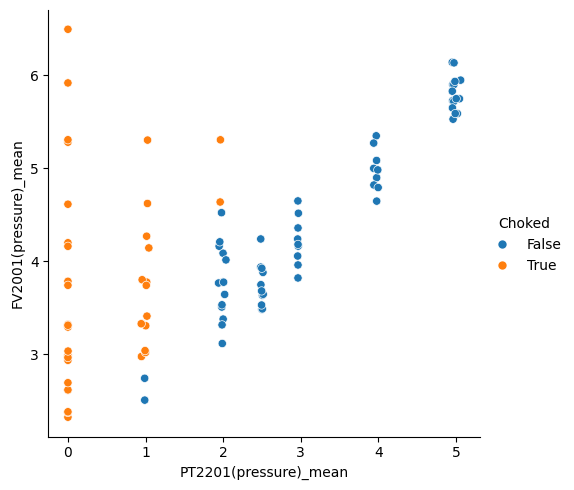

In [53]:
# Define constants and calculations for fluid dynamics
min_pressure_ratio = lambda t: 1.89  # Minimum pressure ratio for dry air at 20°C.
min_inlet_pressure = lambda p_back: ((p_back + 1) * min_pressure_ratio(1)) - 1  # Calculate minimum inlet pressure for choked flow.
choked_flow_bool = lambda p_inlet, p_back: p_inlet >= min_inlet_pressure(p_back)  # Determine if conditions qualify as choked flow.

# Determine and add choked flow status
final_df['Choked'] = final_df.apply(
    lambda row: choked_flow_bool(row['FV2001(pressure)_mean'], row['PT2201(pressure)_mean']), 
    axis=1
)

sns.relplot(data=final_df,
            x='PT2201(pressure)_mean',
            y = 'FV2001(pressure)_mean',
            hue = 'Choked'
            )

# save as pickles

In [54]:
merged_influx_df.to_pickle(f'TB{tb_number}_merged_influx_df.pkl')
stat_df.to_pickle(f'TB{tb_number}_stat_df.pkl')
final_df.to_pickle(f'TB{tb_number}_final_df.pkl')
excel_data.to_pickle(f'TB{tb_number}_metadata_df.pkl')

# Save merged_dict as a pickle file
with open(f'TB{tb_number}_merged_dict.pkl', 'wb') as file:
    pickle.dump(merged_dict, file)
# Save sensor_dict as a pickle file
with open(f'TB{tb_number}_sensor_dict.pkl', 'wb') as file:
    pickle.dump(sensor_dict, file)
# Save ftir_dict as a pickle file
with open(f'TB{tb_number}_ftir_dict.pkl', 'wb') as file:
    pickle.dump(ftir_dict, file)